In [1]:
import pandas as pd

df = pd.read_excel("Skills.xlsx")
#print(df.head())

#Lets remove the importance values:

df2 = df.loc[df["Scale Name"] == "Level"]
df2.reset_index(drop = True, inplace = True)
#print(df2.head())

#Lets now remove the irrelevent columns:

df3 = df2.drop(columns = ["Scale ID","Scale Name","N","Recommend Suppress","Not Relevant","Date","Domain Source"])
print(df3.head())

#NOTE that we have ignored the suppress recomendations, we shall continue with this for now but will need to address this later


  O*NET-SOC Code             Title Element ID           Element Name  \
0     11-1011.00  Chief Executives    2.A.1.a  Reading Comprehension   
1     11-1011.00  Chief Executives    2.A.1.b       Active Listening   
2     11-1011.00  Chief Executives    2.A.1.c                Writing   
3     11-1011.00  Chief Executives    2.A.1.d               Speaking   
4     11-1011.00  Chief Executives    2.A.1.e            Mathematics   

   Data Value  Standard Error  Lower CI Bound  Upper CI Bound  
0        4.75            0.16            4.43            5.07  
1        4.88            0.23            4.43            5.32  
2        4.38            0.18            4.02            4.73  
3        4.88            0.13            4.63            5.12  
4        3.62            0.26            3.11            4.14  


In [2]:
#Lets now discover a bit about our data set:

df3.info()

#We note that there are some occupations for which the standard error and bound values are missing. Lets supress these for now:

df3.drop(columns = ["Standard Error","Lower CI Bound","Upper CI Bound"],inplace = True)
print(df3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30555 entries, 0 to 30554
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   O*NET-SOC Code  30555 non-null  object 
 1   Title           30555 non-null  object 
 2   Element ID      30555 non-null  object 
 3   Element Name    30555 non-null  object 
 4   Data Value      30555 non-null  float64
 5   Standard Error  28700 non-null  float64
 6   Lower CI Bound  28700 non-null  float64
 7   Upper CI Bound  28700 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.9+ MB
  O*NET-SOC Code             Title Element ID           Element Name  \
0     11-1011.00  Chief Executives    2.A.1.a  Reading Comprehension   
1     11-1011.00  Chief Executives    2.A.1.b       Active Listening   
2     11-1011.00  Chief Executives    2.A.1.c                Writing   
3     11-1011.00  Chief Executives    2.A.1.d               Speaking   
4     11-1011.00  Chief Execut

In [3]:
#I shall implement the drop_duplicates method:

df4 = df3[["O*NET-SOC Code","Title"]]
df4.drop_duplicates(inplace=True)
df4.reset_index(drop = True, inplace = True)
#print(df4.head())

#We now need to add the variables. Begin by adding empty columns to the dataframe:

n_jobs = len(set((df3["Title"])))
n_variables = len(set((df3["Element Name"])))

for i in range(n_jobs):
    df4[df3["Element Name"][i]] = ""

#print(df4.head())
#Now we need to fill these columns:

x = df3.loc[df3["Title"] == "Chief Executives"]
y = x["Data Value"]

for i in range(n_variables):
    df4[df4.columns[2+i]][0] = y[i]
    
#We now need to do this procedure for every job:

for j in range(n_jobs):
    x = df3.loc[df3["Title"] == df4.iloc[j,1]]
    y = x["Data Value"]
    y.reset_index(drop = True, inplace = True)
    for i in range(n_variables):
        df4[df4.columns[2+i]][j] = y[i]


<ipython-input-3-398803c0bc0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop_duplicates(inplace=True)
<ipython-input-3-398803c0bc0e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[df3["Element Name"][i]] = ""
C:\Users\jacob\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_g

In [4]:
print(df4.head())
print(df4.tail())

  O*NET-SOC Code                                Title Reading Comprehension  \
0     11-1011.00                     Chief Executives                  4.75   
1     11-1011.03        Chief Sustainability Officers                  4.25   
2     11-1021.00      General and Operations Managers                   4.0   
3     11-2011.00  Advertising and Promotions Managers                   4.0   
4     11-2021.00                   Marketing Managers                  4.25   

  Active Listening Writing Speaking Mathematics Science Critical Thinking  \
0             4.88    4.38     4.88        3.62    1.12              4.75   
1              4.0    4.25     4.12        3.12    1.88              4.12   
2              4.0    3.88      4.0         2.5    1.12               4.0   
3             4.12    3.88     4.12        3.25    0.62              4.12   
4             4.12    3.88     4.12        3.12     1.5              4.25   

  Active Learning  ... Troubleshooting Repairing Quality Contr

### We now have the skills dataframe just as we want it!

In [5]:
#Lets understand our data a bit:

df4.describe()

,O*NET-SOC Code,Title,Reading Comprehension,Active Listening,Writing,Speaking,Mathematics,Science,Critical Thinking,Active Learning,...,Troubleshooting,Repairing,Quality Control Analysis,Judgment and Decision Making,Systems Analysis,Systems Evaluation,Time Management,Management of Financial Resources,Management of Material Resources,Management of Personnel Resources
count,873,873,873.0,873.0,873.0,873.0,873.0,873.0,873.0,873.0,...,873.0,873.0,873.0,873.0,873.0,873.0,873.0,873.00,873.00,873.0
unique,873,873,55.0,44.0,50.0,47.0,69.0,69.0,46.0,51.0,...,50.0,47.0,53.0,43.0,57.0,62.0,35.0,54.00,52.00,56.0
top,25-1062.00,Orthoptists,4.0,4.0,4.0,4.0,2.0,0.0,4.0,3.0,...,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.75,0.88,3.0
freq,1,1,109.0,165.0,90.0,139.0,74.0,129.0,104.0,96.0,...,146.0,415.0,63.0,110.0,86.0,72.0,154.0,83.00,62.00,88.0


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
hist = df4.iloc[:,20].hist(bins=20)

#We can inspect the histogram of any variable we want

### Let's now  import another dataframe with autovalues

In [6]:
df5 = pd.read_excel("US_data_email.xls")
df5 = df5[["Occupation Name","BLS codes","Training set automatable labels"]]
print(df5.head())

                                     Occupation Name BLS codes  \
0                            Recreational Therapists  29-1125_   
1  First-Line Supervisors of Mechanics Installers...  49-1011_   
2                     Emergency Management Directors  11-9161_   
3   Mental Health and Substance Abuse Social Workers  21-1023_   
4                                       Audiologists  29-1181_   

   Training set automatable labels  
0                              NaN  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN  


In [7]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Occupation Name                  702 non-null    object 
 1   BLS codes                        702 non-null    object 
 2   Training set automatable labels  70 non-null     float64
dtypes: float64(1), object(2)
memory usage: 16.6+ KB


In [8]:
#Lets define a function so that we can make occupation ID's consistent:

def title_set(my_string):
    my_list = []
    my_list[:0] = my_string
    my_list.remove("_")
    my_list.append(".00")
    my_output = "".join(my_list)
    return my_output

#print(title_set("45-4023_"))

df5.iloc[:,1] = df5.iloc[:,1].apply(title_set)
print(df5.head())
df5.info()

                                     Occupation Name   BLS codes  \
0                            Recreational Therapists  29-1125.00   
1  First-Line Supervisors of Mechanics Installers...  49-1011.00   
2                     Emergency Management Directors  11-9161.00   
3   Mental Health and Substance Abuse Social Workers  21-1023.00   
4                                       Audiologists  29-1181.00   

   Training set automatable labels  
0                              NaN  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Occupation Name                  702 non-null    object 
 1   BLS codes                        702 non-null    object 
 2   Training set

In [9]:
#Lets now concatenate the auto labels to our 1st dataframe:
import numpy as np
df4["Auto label value"] = np.nan
for i in list(df5["BLS codes"]):
    df4.loc[df4["O*NET-SOC Code"] == i,"Auto label value"] = list(df5.loc[df5["BLS codes"] == i,"Training set automatable labels"])

<ipython-input-9-27a20ac659ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Auto label value"] = np.nan
C:\Users\jacob\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\jacob\Anaconda3\lib\site-packages\pandas\core\indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [10]:
df4.info()

#Note - the auto value count is supposedly 330 non-null, even though it should be 70. After creating a csv from the dataframe,
#I found that there were 70 non-null as expected. Worth bringing up with Mike.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   O*NET-SOC Code                     873 non-null    object 
 1   Title                              873 non-null    object 
 2   Reading Comprehension              873 non-null    object 
 3   Active Listening                   873 non-null    object 
 4   Writing                            873 non-null    object 
 5   Speaking                           873 non-null    object 
 6   Mathematics                        873 non-null    object 
 7   Science                            873 non-null    object 
 8   Critical Thinking                  873 non-null    object 
 9   Active Learning                    873 non-null    object 
 10  Learning Strategies                873 non-null    object 
 11  Monitoring                         873 non-null    object 

In [ ]:
df4.to_csv("test.csv",index=False)

### We now have a dataset which encompass jobs titles, SOC codes, skill levels and hand picked auto labels

### Lets now split and standardize the data:

In [ ]:
#To prevent information about the distribution of the test set leaking into the model, we shall first form a training set
# and form a scaler operator from this, and then apply this to both training and test sets.


In [11]:
#Lets now create a training set which includes only the jobs for which we have hand picked auto values:

training_set = df4.dropna(axis=0,how="any")
training_set.reset_index(drop = True, inplace=True)
#print(training_set.head())
training_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   O*NET-SOC Code                     63 non-null     object 
 1   Title                              63 non-null     object 
 2   Reading Comprehension              63 non-null     object 
 3   Active Listening                   63 non-null     object 
 4   Writing                            63 non-null     object 
 5   Speaking                           63 non-null     object 
 6   Mathematics                        63 non-null     object 
 7   Science                            63 non-null     object 
 8   Critical Thinking                  63 non-null     object 
 9   Active Learning                    63 non-null     object 
 10  Learning Strategies                63 non-null     object 
 11  Monitoring                         63 non-null     object 
 

In [12]:
#Lets apply stratified sampling on this set to create a training and test set
#Code taken from Hands on Machine Learning book

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(training_set,training_set["Auto label value"]):
    strat_train_set = training_set.loc[train_index]
    strat_test_set = training_set.loc[test_index]


In [13]:
strat_train_set.reset_index(drop=True,inplace=True)
strat_test_set.reset_index(drop=True,inplace=True)

In [14]:
strat_train_set["Auto label value"].value_counts()/len(strat_train_set)

1.0    0.54
0.0    0.46
Name: Auto label value, dtype: float64

In [15]:
#Now that we have our training set, lets create a standardiser for it:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True,with_std=True)
scaler.fit(strat_train_set.iloc[:,2:37])
scaled_training_values = scaler.transform(strat_train_set.iloc[:,2:37])
scaled_test_values = scaler.transform(strat_test_set.iloc[:,2:37])
scaled_train_set = strat_train_set.copy()
scaled_test_set = strat_test_set.copy()
#print(strat_train_set.head())

In [16]:
temporary = pd.DataFrame(data=scaled_training_values)
temporary2 = pd.DataFrame(data=scaled_test_values) #we create temporary data frames from the numpy arrays we've just created
#print(temporary)
for i in range(2,37):
    scaled_train_set[scaled_train_set.columns[i]] = temporary[temporary.columns[i-2]]
    scaled_test_set[scaled_test_set.columns[i]] = temporary2[temporary2.columns[i-2]]

#print(scaled_test_set.head())

In [18]:
print(scaled_train_set.head())
print(scaled_test_set.head())

  O*NET-SOC Code                                              Title  \
0     13-2081.00   Tax Examiners and Collectors, and Revenue Agents   
1     19-1023.00                 Zoologists and Wildlife Biologists   
2     43-2011.00  Switchboard Operators, Including Answering Ser...   
3     35-9021.00                                        Dishwashers   
4     23-1023.00         Judges, Magistrate Judges, and Magistrates   

   Reading Comprehension  Active Listening   Writing  Speaking  Mathematics  \
0               0.622682          0.481653 -0.104328  0.349363     0.847035   
1               1.252416          0.481653  1.196523  0.529733     0.567301   
2              -0.787924         -0.855530 -1.236069 -1.038099    -1.245377   
3              -1.896257         -1.858417 -2.055605 -1.912200    -1.670573   
4               1.416147          2.995557  2.016059  1.917195    -0.417364   

    Science  Critical Thinking  Active Learning  ...  Repairing  \
0 -0.765287           0.064649 

### We now have a fully scaled training and test set!

### We can now perform Principal Component Analysis

In [ ]:
#We begin by creating a centred training set:

X = strat_train_set.drop(["Title","O*NET-SOC Code"],axis=1)

#We now use the Scikit learn toolkit to visualise how the explained variance ratio changes with no. dimensions:

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = range(len(X.columns))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.array(dim),np.array(cumsum))

In [ ]:
#Having visualized the effect of dimensionality, we can implement this to our dataset:

pca2 = PCA(n_components=0.95)
X_reduced = pca2.fit_transform(X)
print(X_reduced[1])


### We shall now fit a GP classifier to the unreduced dataset:

In [111]:
#Begin by creating numpy arrays for our input X and output Y:

X = np.array([scaled_train_set.iloc[:,2:37]])
Y = np.array([scaled_train_set.iloc[:,37]])
#X = np.transpose(X)
#Y = np.transpose(Y)
X = np.reshape(X,(50,35)) #Reshape to go from 3d matrix to 2d
Y = np.reshape(Y,(50,1)) # ^

#Now generate a kernel:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

length_scale = 7.61
kernel = 146.6 * RBF(length_scale)
#gpc = GaussianProcessClassifier(kernel=kernel,optimizer='fmin_l_bfgs_b').fit(X, Y)  #This one finds optimal hyperparameters
gpc = GaussianProcessClassifier(kernel=kernel,optimizer=None).fit(X, Y)
gpc.get_params(deep=False)



C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'copy_X_train': True,
 'kernel': 12.1**2 * RBF(length_scale=7.61),
 'max_iter_predict': 100,
 'multi_class': 'one_vs_rest',
 'n_jobs': None,
 'n_restarts_optimizer': 0,
 'optimizer': None,
 'random_state': None,
 'warm_start': False}

In [ ]:
# Now see how this model does on the test set:

X = np.array([strat_test_set.iloc[:,2:37]])
Y = np.array([strat_test_set.iloc[:,37]])
X = np.transpose(X)
Y = np.transpose(Y)
X = np.reshape(X,(13,35)) #Reshape to go from 3d matrix to 2d

gpc.score(X,Y)

### Lets now apply k-fold cross validation on the model:

In [18]:
X_train = np.array(scaled_train_set.iloc[:,2:37])
#X_train = np.transpose(X_train)
y_train = np.array(scaled_train_set.iloc[:,37])
#y_train = np.transpose(y_train)

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


for train_index, test_index in skfolds.split(X_train,y_train):
    clone_gpc = clone(gpc)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]
    
    clone_gpc.fit(X_train_folds,y_train_folds)
    y_pred = clone_gpc.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))
    

0.8
0.9
0.8
0.8
0.6


### What about an F1 score?

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

y_train_pred = cross_val_predict(gpc,X_train,y_train,cv=5)
f1_score(y_train,y_train_pred)

0.8333333333333334

### And how about an AUC value?

In [21]:
from sklearn.metrics import roc_auc_score

def calc_AUC(gpc,X_train,y_train):
    y_probas = cross_val_predict(gpc,X_train,y_train,cv=5,method="predict_proba")
    y_scores = y_probas[:,1]
    return roc_auc_score(y_train,y_scores)

calc_AUC(gpc,X_train,y_train)

0.9404186795491143

### And a log-likelihood?

In [99]:
gpc.log_marginal_likelihood(theta=None, eval_gradient=False, clone_kernel=True)

-25.437499408579207

### It is worth using the model to predict values for the test set to ensure it is working as I want it to:

In [23]:
X_test = np.array(scaled_test_set.iloc[:,2:37])
y_test = np.array(scaled_test_set.iloc[:,37])

y_pred = gpc.predict(X_test)

In [24]:
print(y_test)
print(y_pred)

[0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
[1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0.]


In [25]:
gpc.predict_proba(X_test)

array([[0.13722966, 0.86277034],
       [0.41227574, 0.58772426],
       [0.17336188, 0.82663812],
       [0.8339874 , 0.1660126 ],
       [0.22355032, 0.77644968],
       [0.762219  , 0.237781  ],
       [0.05985844, 0.94014156],
       [0.58256584, 0.41743416],
       [0.50739872, 0.49260128],
       [0.1114736 , 0.8885264 ],
       [0.48265977, 0.51734023],
       [0.30501936, 0.69498064],
       [0.87731279, 0.12268721]])

### We now have a fully working GP classifier!

### Lets now consider the interpretability:

In [112]:
#We shall use the feature permutation method:

from sklearn.inspection import permutation_importance
feature_importance = pd.DataFrame({"Features":np.array(training_set.columns[2:37])})

r = permutation_importance(gpc,X_test,y_test,n_repeats=30,random_state=0)
feature_importance["Importances"] = abs(r.importances_mean)
feature_importance = feature_importance.sort_values(by=['Importances'])
#feature_importance = feature_importance
print(feature_importance)
#print(r.importances_mean)

#for i in r.importances_mean.argsort()[::-1]:
#    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#        print(f"{feature_importance.Features[i]:<8}"
#        f"{r.importances_mean[i]:.3f}"
#        f" +/- {r.importances_std[i]:.3f}")

                             Features   Importances
5                             Science  0.000000e+00
20                       Installation  0.000000e+00
14                        Instructing  1.480297e-17
26                          Repairing  2.564103e-03
19                Equipment Selection  2.564103e-03
31                    Time Management  2.564103e-03
22              Operations Monitoring  5.128205e-03
33   Management of Material Resources  7.692308e-03
23              Operation and Control  1.025641e-02
1                    Active Listening  1.025641e-02
27           Quality Control Analysis  1.794872e-02
34  Management of Personnel Resources  2.051282e-02
32  Management of Financial Resources  2.307692e-02
24              Equipment Maintenance  2.307692e-02
7                     Active Learning  2.307692e-02
11                       Coordination  2.564103e-02
17                Operations Analysis  2.564103e-02
0               Reading Comprehension  2.820513e-02
21          

### Now that we have the feature importances, lets calculate the entropy:

In [28]:
# For the moment we won't normalise the distribution - might have to do this in the future (ask Mike)

def log_calc(my_list):    #This function deals with values of 0
    my_output = [0]*len(my_list)
    for i in range(len(my_list)):
        if my_list[i] != 0.0:
            my_output[i] = np.log(my_list[i])
    return my_output        
            
temp = abs(r.importances_mean)
tempnew = temp/sum(temp)
vector1 = np.array(tempnew)
vector2 = np.array(log_calc(abs(r.importances_mean)))
entropy = -1*np.dot(vector1,vector2)
print(entropy)

2.8734014150784395


In [29]:
#Lets create a function that does all of this:

def calc_entropy(gpc,X_test,y_test):
    r = permutation_importance(gpc,X_test,y_test,n_repeats=30,random_state=0)
    temp = abs(r.importances_mean)
    tempnew = temp/sum(temp)
    vector1 = np.array(tempnew)
    vector2 = np.array(log_calc(abs(r.importances_mean)))
    return -1*np.dot(vector1,vector2)

calc_entropy(gpc,X_test,y_test)

2.8734014150784395

### Lets now implement a gridsearch method:

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(GaussianProcessClassifier(optimizer=None),{'kernel': [1*RBF(1),1*RBF(2)]},cv=5,return_train_score=False,scoring='roc_auc')
clf.fit(X,Y)
clf.cv_results_

In [ ]:
gridsearchdf = pd.DataFrame(clf.cv_results_)
gridsearchdf

In [94]:
#Lets try manually creating the functions:

n_lengthscale = 10
n_const = 10

#The above values control the number of different hyperparaemters we want to test on

lengthscale = np.linspace(7.5,8.5,n_lengthscale)
const = np.linspace(120.0,150.0,n_const)

resultsdf = pd.DataFrame({'length_scale':[0.0]*(n_lengthscale*n_const),'const':[0.0]*(n_lengthscale*n_const),'AUC':[0.0]*(n_lengthscale*n_const),"log-likelihood":[0.0]*(n_lengthscale*n_const),"entropy":[0.0]*(n_lengthscale*n_const)})

iteration = 0

for i in lengthscale:
    for j in const:
        kernel = j*RBF(i)
        gpc = GaussianProcessClassifier(kernel=kernel,optimizer=None).fit(X, Y)
        
        #y_probas = cross_val_predict(gpc,X_train,y_train,cv=5,method="predict_proba")
        #y_scores = y_probas[:,1]
        resultsdf.iloc[iteration]['AUC'] = calc_AUC(gpc,X_train,y_train)
        
        resultsdf.iloc[iteration]['log-likelihood'] = gpc.log_marginal_likelihood(theta=None, eval_gradient=False, clone_kernel=True)
        
        resultsdf.iloc[iteration]['length_scale'] = i
        resultsdf.iloc[iteration]['const'] = j
        
        
        resultsdf.iloc[iteration]['entropy'] = calc_entropy(gpc,X_test,y_test)
        

        #r = permutation_importance(gpc,X_test,y_test,n_repeats=30,random_state=0)
        #temp = abs(r.importances_mean)
        #tempnew = temp/sum(temp)
        #vector1 = np.array(tempnew)
        #vector2 = np.array(log_calc(abs(r.importances_mean)))
        #resultsdf.iloc[iteration]['entropy'] = -1*np.dot(vector1,vector2)
        
        iteration+=1

print(resultsdf.head())

C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

   length_scale       const       AUC  log-likelihood   entropy
0           7.5  120.000000  0.953301      -25.546832  3.196589
1           7.5  123.333333  0.954911      -25.543991  3.197071
2           7.5  126.666667  0.954911      -25.541634  3.164043
3           7.5  130.000000  0.954911      -25.539723  3.162693
4           7.5  133.333333  0.954911      -25.538226  3.166456


In [95]:
resultsdf = resultsdf.sort_values(by=['log-likelihood'])

In [108]:
print(resultsdf.head(20))

    length_scale       const       AUC  log-likelihood   entropy
0       7.500000  120.000000  0.953301      -25.546832  3.196589
1       7.500000  123.333333  0.954911      -25.543991  3.197071
2       7.500000  126.666667  0.954911      -25.541634  3.164043
3       7.500000  130.000000  0.954911      -25.539723  3.162693
4       7.500000  133.333333  0.954911      -25.538226  3.166456
5       7.500000  136.666667  0.953301      -25.537111  3.150554
6       7.500000  140.000000  0.953301      -25.536350  3.158183
9       7.500000  150.000000  0.953301      -25.535955  3.146231
7       7.500000  143.333333  0.953301      -25.535919  3.145295
8       7.500000  146.666667  0.953301      -25.535795  3.145295
10      7.611111  120.000000  0.953301      -25.533250  3.211540
11      7.611111  123.333333  0.953301      -25.529824  3.201901
12      7.611111  126.666667  0.953301      -25.526897  3.202928
13      7.611111  130.000000  0.953301      -25.524431  3.201227
14      7.611111  133.333

### Lets visualise the accuracy vs interpretability:

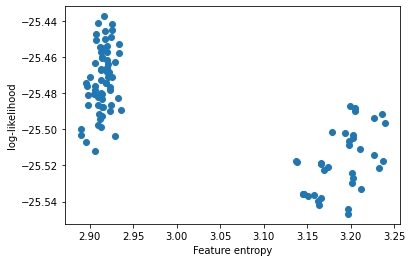

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt

#plt = resultsdf.plot.scatter(x="entropy",y="log-likelihood")
plt.scatter(resultsdf['entropy'],resultsdf['log-likelihood'])
plt.xlabel("Feature entropy")
plt.ylabel("log-likelihood")
#plt.show()
plt.savefig('clustergraph.png',bbox_inches='tight')
plt.show()

In [128]:
plt.savefig('clustergraph.png')

<Figure size 432x288 with 0 Axes>